<a href="https://colab.research.google.com/github/JesseOtradovec/DS-Unit-2-Regression-Classification/blob/master/Otradovec_of_assignment_regression_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.


The data comes from renthop.com, an apartment listing website.

- [X] Look at the data. What's the distribution of the target, `price`, and features such as `longitude` and `latitude`? Remove outliers.
- [X] After you remove outliers, what is the mean price in your subset of the data?
- [x] Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [1]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module1')

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 94, done.
remote: Total 94 (delta 0), reused 0 (delta 0), pack-reused 94
Unpacking objects: 100% (94/94), done.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> origin/master
     |████████████████████████████████| 92kB 3.5MB/s 
     |████████████████████████████████| 112kB 8.5MB/s 
     |████████████████████████████████| 133kB 39.5MB/s 
     |████████████████████████████████| 57.7MB 65.7MB/s 
     |████████████████████████████████| 7.1MB 28.7MB/s 
     |████████████████████████████████| 235kB 44.1MB/s 
     |████████████████████████████████| 614kB 33.4MB/s 
     |████████████████████████████████| 225kB 39.0MB/s 
     |████████████████████████████████| 768kB 36.2MB/s 
     |████████████████████████████████| 194kB 38.7MB/s 
     |████████████████████████████████| 51kB 11.9MB/s 
     |█████████████████████

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
df.head()
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [0]:
df=df.query('price < 1000000')

In [6]:
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,49348.000000,49348.000000,49348.000000,49348.000000,49348.000000,49348.000000,49348.000000,49348.000000,49348.000000,49348.000000,49348.000000,49348.000000,49348.000000,49348.000000,49348.000000,49348.000000,49348.000000,49348.000000,49348.000000,49348.000000,49348.000000,49348.000000,49348.000000,49348.000000,49348.000000,49348.000000,49348.000000,49348.000000,49348.000000
mean,1.212197,1.541643,40.741543,-73.955713,3672.828666,0.525107,0.476939,0.476797,0.446442,0.424840,0.413999,0.366013,0.052545,0.268542,0.185418,0.177069,0.132832,0.138688,0.104097,0.087197,0.060691,0.055362,0.051856,0.046851,0.043892,0.042616,0.039373,0.027519,0.026202
std,0.501436,1.115055,0.638561,1.177960,2535.409019,0.499374,0.499473,0.499466,0.497128,0.494324,0.492553,0.481718,0.223126,0.443205,0.388640,0.381731,0.339397,0.345625,0.305390,0.282126,0.238766,0.228688,0.221739,0.211322,0.204858,0.201991,0.194484,0.163591,0.159736
min,0.000000,0.000000,0.000000,-118.271000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,40.728300,-73.991700,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,40.751800,-73.977900,3150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,40.774300,-73.954800,4100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,8.000000,44.883500,0.000000,135000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
df=df.query('price > 1000')

In [8]:
df.query("bathrooms>6")

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
1990,10.0,2,2016-04-09 04:34:31,***The building?s well-attended lobby welcomes...,W 52 St.,40.7633,-73.9849,3600,260 W 52 St.,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17047,6.5,7,2016-06-22 03:15:54,This landmark English stone manor sits majesti...,206 Upper Mountain Avenu,40.8336,-74.2160,14500,206 Upper Mountain Avenu,low,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42573,7.0,5,2016-04-07 17:06:29,Extraordinary in every way. This single family...,West 9th St- High Class Townhome,40.7335,-73.9974,60000,47th West 9th St,low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df=df.query('bathrooms<10')

In [10]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.preprocessing import StandardScaler

In [12]:
x=df[['bathrooms','bedrooms']]
scaler=StandardScaler()

x.shape

(49326, 2)

In [0]:
scaled_data=scaler.fit_transform(x)

In [14]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
x_pca[:,0].shape

(49326,)

In [0]:
df['pca1']=x_pca[:,0]
df['pca2']=x_pca[:,1]

In [16]:
df['price'].shape


(49326,)

In [17]:
pca.explained_variance_ratio_

array([0.76743939, 0.23256061])

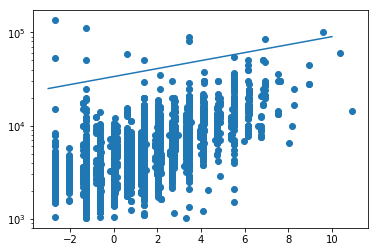

In [18]:
plt.scatter(x_pca[:,0],df['price'])
pt1=np.array([-3,10])
pt2=np.array([25000,90000])
pt2-pt1
plt.plot(pt1, pt2)
plt.yscale("log")

In [0]:
#df=df.query('price < 70000')

In [20]:
pt1=np.array([-3,25000])
pt2=np.array([10,90000])
pt2-pt1

array([   13, 65000])

In [0]:
df=df.query('not(price>38000 and pca1<0)')

In [22]:
#There are errors in latitude and longitude.
df.latitude.describe()

count    49322.000000
mean        40.741549
std          0.638727
min          0.000000
25%         40.728300
50%         40.751800
75%         40.774300
max         44.883500
Name: latitude, dtype: float64

In [23]:
df.query('latitude<1 or longitude>-1')
#we have 50000 entries and 12 are a problem, lets go ahead and drop them. 

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,pca1,pca2
2787,5.0,6,2016-04-18 02:14:51,***NO BROKER FEE***<BR><BR>Situated on a gorge...,Decatur Street,0.0,0.0,9995,259 Decatur Street,low,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,8.186022,2.531511
14104,1.0,1,2016-05-31 22:26:06,Gorgeous one bedroom in Sunset Park-Private en...,"Sunset Park, Brooklyn",0.0,0.0,1750,145 28 Street,low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.643797,0.043712
21715,1.0,1,2016-06-01 19:59:46,Big 2 bedroom in clean and quite multi family ...,88 van Sicklen street,0.0,0.0,1725,Van Sicklen street,low,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.643797,0.043712
22471,1.0,2,2016-06-16 15:38:11,Flatiron Duplex!At the intersection of Flatiro...,"Flatiron, Kips Bay, Gramercy",0.0,0.0,4395,219 E 28th,low,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.009595,-0.590490
25860,1.0,2,2016-05-07 08:15:32,Spacious and bright 2 bedroom fully renovated ...,Madison Ave,0.0,0.0,2950,1632 Madison Ave,medium,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.009595,-0.590490
27181,1.0,2,2016-05-10 10:25:19,"New construction, luxury highrise, The two bed...",24th St LIC,0.0,0.0,3619,41-42 24th St,low,1,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.009595,-0.590490
33286,4.0,3,2016-05-11 18:07:15,"This high floor, mint condition, corner unit b...",450 East 83rd Street apt 21D (Furnished),0.0,0.0,16500,450 East 83rd Street,low,1,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,4.868714,3.019414
34390,1.0,1,2016-05-10 14:30:12,NO FEE! Spacious one bedroom apartment in a F...,west 87,0.0,0.0,3600,247 west 87,low,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.643797,0.043712
35826,1.0,2,2016-05-24 17:43:39,Fantastic 2 bed with the works! It has 2 queen...,118 W 109th,0.0,0.0,3200,118 W 109th,low,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.009595,-0.590490
36448,1.0,1,2016-05-10 10:11:20,No fee! Prime NOLITA neighborhood with amazing...,Mott St,0.0,0.0,3495,246 Mott St,low,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.643797,0.043712


In [0]:
df=df.query('latitude>1 and longitude<-1')

In [0]:
lat_long=df[['latitude','longitude']]

In [26]:
lat_long.shape

(49310, 2)

In [0]:
scaler=StandardScaler()

In [0]:
scaled_data=scaler.fit_transform(lat_long)

In [0]:
pca=PCA(n_components=2)

In [0]:
# pca.fit(scaled_data)

In [0]:
x_pca=pca.fit_transform(scaled_data)

In [32]:
x_pca

array([[ 0.31998062, -0.50441374],
       [-0.50284762,  0.46143604],
       [ 0.22423354, -0.05820477],
       ...,
       [-0.04815931,  0.14445029],
       [ 0.60783372, -0.39275212],
       [-1.48770187,  1.15374622]])

In [0]:
df['pcalatlong1']=x_pca[:,0]

In [0]:
df['pcalatlong2']=x_pca[:,1]

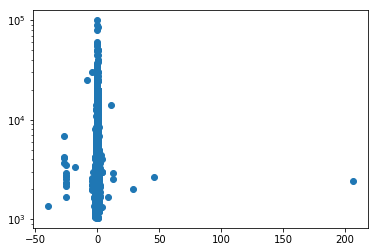

In [35]:
plt.scatter(df['pcalatlong1'],df['price'])
plt.yscale("log")

In [36]:
stdev=np.std(df['pcalatlong1'])
stdev

1.171715226663396

In [0]:
df=df.query("pcalatlong1 > -4*1.171715226663396 and pcalatlong1 < 4*1.171715226663396")

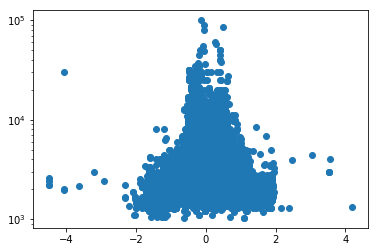

In [38]:
plt.scatter(df['pcalatlong1'],df['price'])
plt.yscale("log")
plt.show()

In [0]:
def gaussian(x, amp, cen, wid):
  return amp*np.exp(-(x-cen)**2/wid)

In [40]:
from scipy.optimize import curve_fit
init_vals=[1,0,1]
best_vals, covar=curve_fit(gaussian,df['pcalatlong1'],df['price'], p0=init_vals)
print('best values: {}'.format(best_vals))

best values: [3.96360896e+03 1.01061547e-01 2.63252932e+00]


In [0]:
x=np.linspace(-4,4,101)
y=gaussian(x,3.96376858e+03, 1.00989329e-01, 2.63046100e+00)

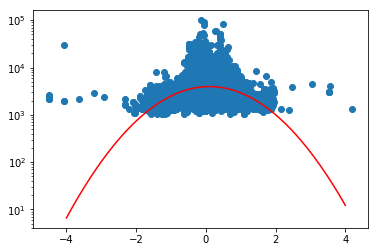

In [42]:
plt.scatter(df['pcalatlong1'],df['price'])
plt.yscale("log")
plt.plot(x,y, c='r')
plt.show()


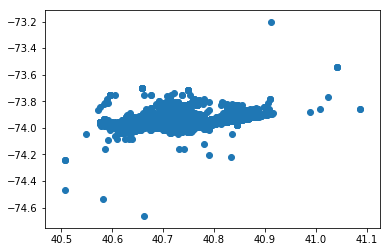

In [43]:
plt.scatter(df['latitude'],df['longitude'])

In [44]:
df['longitude'].min()

-74.6637

In [0]:
df=df.query("not(longitude == -74.6637)")

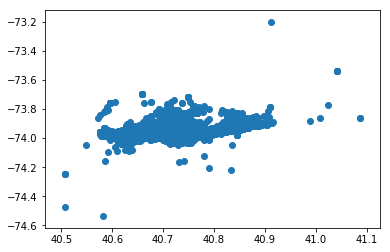

In [46]:
plt.scatter(df['latitude'],df['longitude'])

In [47]:
print("mean price is:", df['price'].mean())

mean price is: 3666.6990423243924


I'm plotting the price as a linear combination of bedrooms and bathrooms.

In [48]:
X=df[['bedrooms','bathrooms','latitude','longitude']]
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)
pca=PCA(n_components=4)
x_pca=pca.fit_transform(scaled_data)
x_pca.shape


(49286, 4)

In [49]:

df['pca1']=x_pca[:,0]
df['pca2']=x_pca[:,1]
df['pca3']=x_pca[:,2]
df['pca4']=x_pca[:,3]
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,pca1,pca2,pcalatlong1,pcalatlong2,pca3,pca4
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.331900,-0.084009,0.319981,-0.504414,1.424991,-0.250423
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.094033,0.924828,-0.502848,0.461436,-0.528098,-0.676929
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.741752,-0.828142,0.224234,-0.058205,-0.462125,-0.070404
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.621870,0.232757,-0.044917,0.009416,0.049134,0.058914
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.462328,1.743541,-0.882114,0.737869,-0.410118,-1.919590


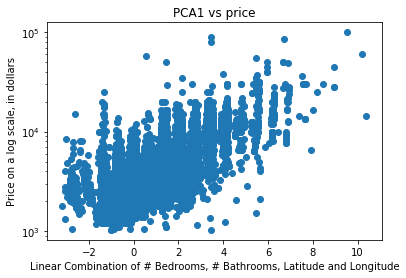

In [50]:
fig, ax = plt.subplots()
plt.scatter(df['pca1'],df['price'])
plt.yscale('log')
plt.title("PCA1 vs price")
plt.xlabel("Linear Combination of # Bedrooms, # Bathrooms, Latitude and Longitude")
plt.ylabel("Price on a log scale, in dollars")
fig.set_facecolor("w")

In [55]:
import itertools
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
ln_y=np.log(df['price'].values)
df['ln_y']=ln_y
features=['pca1','pca2','pca3','pca4']
#Linear regression won't work very well here... I want logrithmic regression.
# # 2. Instantiate this class
#model=LinearRegression()
model=LinearRegression()
# # 3. Arrange X features matrix & y target vector
# features=['Average Recent Growth in Personal Incomes', "US Military Fatalities per Million"]
# target = "Incumbent Party Vote Share"
X=df[features]

# # 4. Fit the model
model.fit(X,ln_y)
fig=px.scatter_3d(df, 'pca1', 'pca2', 'ln_y')
features = ['pca1', 'pca2']
target = 'ln_y'
model = LinearRegression()
model.fit(df[features], df[target] )
xmin=df['pca1'].min()
num=100
xmax=df['pca1'].max()
ymin, ymax = df['pca2'].min(), df['pca2'].max()
xcoords = np.linspace(xmin, xmax, num)
ycoords = np.linspace(ymin, ymax, num)
coords = list(itertools.product(xcoords, ycoords))


predictions = model.predict(coords)
Z = predictions.reshape(num, num).T

fig.add_trace(go.Surface(x=xcoords, y=ycoords, z=Z))

In [0]:
import itertools
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression

# def regression_log_3d(df, x, y, z, num=100, **kwargs):
#     """
#     Visualize linear regression in 3D: 2 features + 1 target
    
#     df : Pandas DataFrame
#     x : string, feature 1 column in df
#     y : string, feature 2 column in df
#     z : string, target column in df
#     num : integer, number of quantiles for each feature
#     """
    
#     # Plot data
#     fig = px.scatter_3d(df, x, y, z, **kwargs)
    
#     # Fit Linear Regression
#     features = [x, y]
#     target = z
#     model = LinearRegression()
#     model.fit(df[features], np.log(df[target])    
    
#     # Define grid of coordinates in the feature space
    
#     xmin=df[x].min()

#     xmax=df[x].max()
#     ymin, ymax = df[y].min(), df[y].max()
#     xcoords = np.linspace(xmin, xmax, num)
#     ycoords = np.linspace(ymin, ymax, num)
#     coords = list(itertools.product(xcoords, ycoords))
    
#     # Make predictions for the grid
#     predictions = model.predict(coords)
#     Z = predictions.reshape(num, num).T
    
#     # Plot predictions as a 3D surface (plane)
#     fig.add_trace(go.Surface(x=xcoords, y=ycoords, z=Z))
    
#     return fig